### Import des données

In [1]:
import pandas as pd
import numpy as np 

df = pd.read_csv("clean_data.csv")
df["smoker_bmi"] = df["smoker"]*df["bmi"]
# df["smoker_age"] = df["smoker"]*df["age"]
df = df.drop(["age_category", "bmi_index", "sex_categ"], axis=1) # avec bmi 
df 

,age,sex,bmi,children,smoker,region,charges,bmi_categories,smoker_bmi
0,19,female,27.900,0,1,southwest,16884.92400,overweight,27.90
1,18,male,33.770,1,0,southeast,1725.55230,obesity class 1,0.00
2,28,male,33.000,3,0,southeast,4449.46200,obesity class 1,0.00
3,33,male,22.705,0,0,northwest,21984.47061,normal,0.00
4,32,male,28.880,0,0,northwest,3866.85520,overweight,0.00
...,...,...,...,...,...,...,...,...,...
1332,50,male,30.970,3,0,northwest,10600.54830,obesity class 1,0.00
1333,18,female,31.920,0,0,northeast,2205.98080,obesity class 1,0.00
1334,18,female,36.850,0,0,southeast,1629.83350,obesity class 2,0.00
1335,21,female,25.800,0,0,southwest,2007.94500,overweight,0.00


### Nettoyage/Encodage des données & pipelines, transformers, modèles...

In [2]:
from sklearn.pipeline import make_pipeline, FeatureUnion
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import RobustScaler, OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer 

from sklearn.preprocessing import PolynomialFeatures

# selection des features et de la cible
X = df.drop('charges', axis=1)
y = df.charges

# Création du train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

# Sélection des variables numériques
num_col = list(X.select_dtypes(include=[float,int]).columns)
# Sélection des variables catégorielles
cat_col = list(X.select_dtypes(include=[object]).columns)


# pipeline pour les valeurs numériques
# cela permet de créer une succession d'étapes (ici il n'y en a qu'une)
my_num_pipe = make_pipeline(PolynomialFeatures(2), RobustScaler())
# Créer un pipeline pour les variables catégorielles
categorical_pipeline = make_pipeline(OneHotEncoder(), PolynomialFeatures(2))


# ColumnTransformer permet de faire des opérations sur des sélections de colonnes
preprocessing = ColumnTransformer([
    ("numeric", my_num_pipe, num_col),
    ("categorical", categorical_pipeline, cat_col)
])

preprocessing.fit(X_train)
feature_names = preprocessing.get_feature_names_out(X.columns)
feature_names

array(['numeric__1', 'numeric__age', 'numeric__bmi', 'numeric__children',
       'numeric__smoker', 'numeric__smoker_bmi', 'numeric__age^2',
       'numeric__age bmi', 'numeric__age children', 'numeric__age smoker',
       'numeric__age smoker_bmi', 'numeric__bmi^2',
       'numeric__bmi children', 'numeric__bmi smoker',
       'numeric__bmi smoker_bmi', 'numeric__children^2',
       'numeric__children smoker', 'numeric__children smoker_bmi',
       'numeric__smoker^2', 'numeric__smoker smoker_bmi',
       'numeric__smoker_bmi^2', 'categorical__1',
       'categorical__sex_female', 'categorical__sex_male',
       'categorical__region_northeast', 'categorical__region_northwest',
       'categorical__region_southeast', 'categorical__region_southwest',
       'categorical__bmi_categories_normal',
       'categorical__bmi_categories_obesity class 1',
       'categorical__bmi_categories_obesity class 2',
       'categorical__bmi_categories_obesity class 3',
       'categorical__bmi_categori

In [3]:
# # TESTS DES COEFFICIENTS PB

# from sklearn.pipeline import make_pipeline
# from sklearn.dummy import DummyRegressor
# from sklearn.preprocessing import RobustScaler, OneHotEncoder, PolynomialFeatures, StandardScaler
# from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
# from sklearn.model_selection import train_test_split
# from sklearn.compose import ColumnTransformer 

# from sklearn.preprocessing import PolynomialFeatures

# # selection des features et de la cible
# X = df.drop('charges', axis=1)
# y = df.charges


# # Création du train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])

# # Sélection des variables numériques
# num_col = list(X.select_dtypes(include=[float, int]).columns)
# # Sélection des variables catégorielles
# cat_col = list(X.select_dtypes(include=[object]).columns)

# # Pipeline pour les valeurs numériques
# my_num_pipe = make_pipeline(PolynomialFeatures(2), RobustScaler())
# # Créer un pipeline pour les variables catégorielles
# categorical_pipeline = make_pipeline(OneHotEncoder(), PolynomialFeatures(2))

# # ColumnTransformer permet de faire des opérations sur des sélections de colonnes
# preprocessing = ColumnTransformer([
#     ("numeric", my_num_pipe, num_col),
#     ("categorical", categorical_pipeline, cat_col)
# ])

# # Créer le modèle Lasso
# lasso_model = Lasso(alpha=1.0, random_state=42)

# # Créer le pipeline complet
# full_pipeline = make_pipeline(preprocessing, lasso_model)

# # Entraîner le modèle
# full_pipeline.fit(X_train, y_train)

# # Accéder au modèle dans le pipeline
# lasso_model = full_pipeline[-1]

# # Accéder aux coefficients
# coefficients = lasso_model.coef_

# # Afficher les résultats
# result = list(zip(X.columns, coefficients))
# for tuple in result:
#     print(tuple)

In [4]:
# import pandas as pd
# from sklearn.pipeline import make_pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import RobustScaler, OneHotEncoder, PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split


# # Features and target
# X = df.drop('charges', axis=1)
# y = df['charges']

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42)

# # Numeric columns
# num_col = list(X.select_dtypes(include=[float, int]).columns)

# # Categorical columns
# cat_col = list(X.select_dtypes(include=[object]).columns)

# # Numeric pipeline
# num_pipe = make_pipeline(PolynomialFeatures(2, include_bias=False), RobustScaler())

# # Categorical pipeline
# cat_pipe = make_pipeline(OneHotEncoder(), PolynomialFeatures(2, include_bias=False))

# # ColumnTransformer
# preprocessing = ColumnTransformer([
#     ("numeric", num_pipe, num_col),
#     ("categorical", cat_pipe, cat_col)
# ])

# # # Full pipeline including preprocessing and linear regression
# full_pipeline = make_pipeline(preprocessing, LinearRegression())

# # # Fit the pipeline to the training data
# full_pipeline.fit(X_train, y_train)

# # Extract coefficients from the linear regression model

# coefficients = my_pipe_lr[-1].coef_

# result = list(zip(X.columns, coefficients))
# for tuple in result:
#     print(tuple)
# #print(result)

In [5]:
# age' (0.0): L'âge n'a apparemment aucune contribution à la prédiction de la variable cible (peut-être qu'il est exclu du modèle en raison du terme Lasso).
# 'sex' (-2516.853191426364): Une unité d'augmentation dans la variable 'sex' est associée à une diminution d'environ 2516.85 unités dans la variable cible (en supposant que toutes les autres variables restent constantes).
# 'bmi' (259.155002102034): Une unité d'augmentation dans la variable 'bmi' est associée à une augmentation d'environ 259.16 unités dans la variable cible.
# 'children' (2030.5049181589575): Une unité d'augmentation dans la variable 'children' est associée à une augmentation d'environ 2030.50 unités dans la variable cible.
# 'smoker' (-13230.800216679068): Si le patient est un fumeur (1), cela est associé à une diminution significative d'environ 13230.80 unités dans la variable cible par rapport à un non-fumeur (0).
# 'region' (682.2261542909383): La variable 'region' a une contribution positive d'environ 682.23 unités à la variable cible.
# 'bmi_categories' (8670.04922615023): La variable 'bmi_categories' a une contribution positive d'environ 8670.05 unités à la variable cible.
# 'smoker_bmi' (160.33348543225566): Une unité d'augmentation dans la variable 'smoker_bmi' est associée à une augmentation d'environ 160.33 unités dans la variable cible.

#### Voir si les données ont bien été modifiées

In [6]:
# Appliquez le pipeline sur les données d'entraînement et de test
# X_train_transformed = preprocessing.fit_transform(X_train)
# X_train_transformed

In [7]:
# # Supposez que X_train_transformed soit une matrice NumPy résultante de la transformation
# # Appliquer le ColumnTransformer sur les données d'entraînement
# X_train_transformed = preprocessing.fit_transform(X_train)

# # Obtenez les noms de colonnes après la transformation
# all_columns = preprocessing.transformers_[0][1].get_feature_names_out(cat_col).tolist() + num_col

# # Créez un DataFrame pandas à partir des données transformées et des noms de colonnes
# X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=all_columns)

# # Affichez le DataFrame
# print(X_train_transformed_df.head())

### DummyRegressor

In [8]:
# DUMMY REGRESSOR (ne prend pas en compte les variables, prédit la moyenne de chaque valeur Y)
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X, y)
print(f"regression dummy : {dummy_regr.score(X_test, y_test)}")

regression dummy : -0.0020162626112618653


### LinearRegression

In [9]:
# REGRESSION LINEAIRE
# j'ajoute la régression linéaire au pipeline
my_pipe_lr = make_pipeline(preprocessing, LinearRegression())
# Je fit sur les données
my_pipe_lr.fit(X_train, y_train)
# afficher le score
print(f"regression linéaire : {my_pipe_lr.score(X_test, y_test)}")

regression linéaire : 0.8963888558738191


In [10]:
# Faire une prédiction sur de nouvelles données
y_pred = my_pipe_lr.predict(X_test)

# X_new doit être un tableau ou une liste contenant les
# caractéristiques des nouvelles données sur lesquelles vous voulez faire des prédictions.

# Afficher les prédictions
print("Prédictions :", y_pred)

Prédictions : [ 3625.01383657 34800.68184721  7670.07909203 40576.75981677
 31962.83636964  7654.16262069  3211.69501558  5242.35742427
  2504.54911734 40593.85182727 10693.34497485 13088.63746281
  3039.16909286 10911.98689153  3459.15114696  3275.70552506
  3061.68389595  6074.30999854  4532.32844694 18206.39283916
 13394.25988127  8538.68475267 13724.55739079 15648.29159001
  6982.51184164  1906.3989473  11018.82880132 12909.87343007
  2859.32428538  3372.33118381  3909.72195276 11744.30529531
 10461.60439068 21704.17279675 29944.42582396 46847.98823441
  3342.57120163 12259.4950375  16048.402781   10631.58941243
  4689.0416826   5010.23799649 26058.36171254 16659.10327899
 29166.3865144   2693.03702886 11452.56319015 11702.39107358
 41281.98770633 10003.05430435  6380.9886998  41304.28138282
 15923.52435973 14553.87459762  4983.51892193 15725.9513021
  9528.75522018  9110.32064058  9420.99170602  4786.70229008
  4663.03209548 41765.08093003 11849.97483656 11312.21939735
 15077.3660

In [11]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
print(f"r2 : {r2}")
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"rmse : {rmse}")

r2 : 0.8963888558738191
rmse : 3874.905245828385


In [12]:
# Extract coefficients from the linear regression model
coefficients = my_pipe_lr[-1].coef_
result = list(zip(feature_names, coefficients))
# for tuple in result:
#     print(tuple)

liste = []
for i in range(len(result)):
    liste.append(list([result[i][0], result[i][-1]]))

sorted(liste, reverse=False)
# feature_names = preprocessing.get_feature_names_out(X.columns)
# feature_names

[['categorical__1', 1.4218105579292007e-10],
 ['categorical__bmi_categories_normal', -358.05472395436493],
 ['categorical__bmi_categories_normal bmi_categories_obesity class 1', 0.0],
 ['categorical__bmi_categories_normal bmi_categories_obesity class 2', 0.0],
 ['categorical__bmi_categories_normal bmi_categories_obesity class 3', 0.0],
 ['categorical__bmi_categories_normal bmi_categories_overweight', 0.0],
 ['categorical__bmi_categories_normal bmi_categories_underweight', 0.0],
 ['categorical__bmi_categories_normal^2', -358.05472395436493],
 ['categorical__bmi_categories_obesity class 1', 461.63771907242074],
 ['categorical__bmi_categories_obesity class 1 bmi_categories_obesity class 2',
  0.0],
 ['categorical__bmi_categories_obesity class 1 bmi_categories_obesity class 3',
  0.0],
 ['categorical__bmi_categories_obesity class 1 bmi_categories_overweight',
  0.0],
 ['categorical__bmi_categories_obesity class 1 bmi_categories_underweight',
  0.0],
 ['categorical__bmi_categories_obesity c

In [13]:
# my_pipe_lr[-1].coef_
# plus le coef est gros plus l'info est importante
# coef des variables (avec polynomialfeatures)

In [14]:
# # Extract coefficients from the linear regression model
# coefficients = my_pipe_lr[-1].coef_
# poly = PolynomialFeatures(2)
# # Extract feature names from PolynomialFeatures after fitting
# poly_feature_names = poly.get_feature_names_out(X.columns)

# # Create a DataFrame with coefficients and feature names
# coef_df = pd.DataFrame({'Feature': poly_feature_names, 'Coefficient': coefficients})

# # Display the DataFrame
# print(coef_df)

In [15]:
# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import make_pipeline

# # selection des features et de la cible
# X = X
# y = y

# # Create polynomial features and linear regression
# degree = 2  # You can adjust the degree as needed
# poly = PolynomialFeatures(degree)

# # Fit the pipeline to the data
# my_pipe_lr.fit(X, y)

# # Extract coefficients from the linear regression model
# coefficients = my_pipe_lr[-1].coef_

# # Extract feature names from PolynomialFeatures
# poly_feature_names = poly.get_feature_names_out(X.columns)

# # Create a DataFrame with coefficients and feature names
# coef_df = pd.DataFrame({'Feature': poly_feature_names, 'Coefficient': coefficients})

# # Display the DataFrame
# print(coef_df)

### Lasso

In [16]:
# REGRESSION LASSO CV
my_pipe_lasso = make_pipeline(preprocessing, Lasso(alpha=46.5))  # avant 21.5, 46.5
# Je fit sur les données
my_pipe_lasso.fit(X_train, y_train)
# le score
print(f"regression lasso : {my_pipe_lasso.score(X_test, y_test)}")

regression lasso : 0.9039738206920175


/home/utilisateur/Documents/DEV-IA/projets/machine_learning_assurance/machinelearning_assurance/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18724213.578464508, tolerance: 16674164.867911292
  model = cd_fast.sparse_enet_coordinate_descent(


In [17]:
# Faire une prédiction sur de nouvelles données
y_pred = my_pipe_lasso.predict(X_test)

# X_new doit être un tableau ou une liste contenant les
# caractéristiques des nouvelles données sur lesquelles vous voulez faire des prédictions.

# Afficher les prédictions
print("Prédictions :", y_pred)

Prédictions : [ 3990.81137307 35073.70449812  7643.89456224 41350.16239417
 29852.82141322  7658.99000994  3983.49524168  4705.52078849
  2450.23873793 40202.61235499 10857.03827073 12886.19798002
  3384.90207734 12876.62772706  2917.2893013   2945.623245
  3661.07388372  6215.20347765  3817.34867256 20922.18362453
 13053.61945778  9194.27446796 13199.05050323 15223.00980174
  6949.65916041  2453.59663956 11896.58686156 12060.76701878
  3344.74058293  4096.77397247  3713.53161078 11882.86459618
 10319.96780139 21091.27250343 30213.50965082 48986.1588239
  3256.91735493 12446.50377603 16137.93814745 11513.71402919
  5552.32265029  5154.57546234 26164.20347884 16628.22200372
 28865.01761209  3308.37904748 11420.53812475 11338.67179254
 40161.70104548 10391.77809356  5808.67328636 41213.66422587
 15717.0938612  14302.25788598  4558.10598174 15887.68340483
  8672.52133191  9254.50734105 10218.94817053  4829.69745714
  4481.93422471 41680.11143833 12048.56440629 10934.70735938
 15134.252599

In [18]:
#from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
print(f"r2 : {r2}")
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"rmse : {rmse}")

r2 : 0.9039738206920175
rmse : 3730.3765903221993


In [30]:
# R²

# R² mesure la proportion de la variance de la variable dépendante
# (la variable que vous essayez de prédire) qui est expliquée par le modèle.
# Une valeur de R² proche de 1.0 indique un bon ajustement du modèle aux données,
# signifiant que le modèle explique une grande partie de la variabilité de la variable dépendante.
# Dans notre cas, un R² de 0.904 suggère que votre modèle explique environ 90.4%
# de la variance dans les données de test. C'est généralement considéré comme un bon ajustement.

# RMSE

# RMSE mesure l'écart moyen entre les valeurs réelles et les valeurs prédites par le modèle.
# Il est exprimé dans les mêmes unités que la variable dépendante.
# Une valeur de RMSE plus basse indique une meilleure performance du modèle.
# Dans notre cas, un RMSE de 3730.38 indique que, en moyenne, les prédictions de notre modèle
# ont une erreur d'environ 3730.38 unités par rapport aux valeurs réelles.


# Conclusion

# En résumé, avec un R² élevé et un RMSE relativement bas,
# il semble que votre modèle de régression linéaire performe bien sur les données de test.
# Cependant, il est toujours recommandé de compléter ces scores avec
# une analyse visuelle des résidus et d'autres métriques d'évaluation,
# en fonction du contexte spécifique de votre problème.

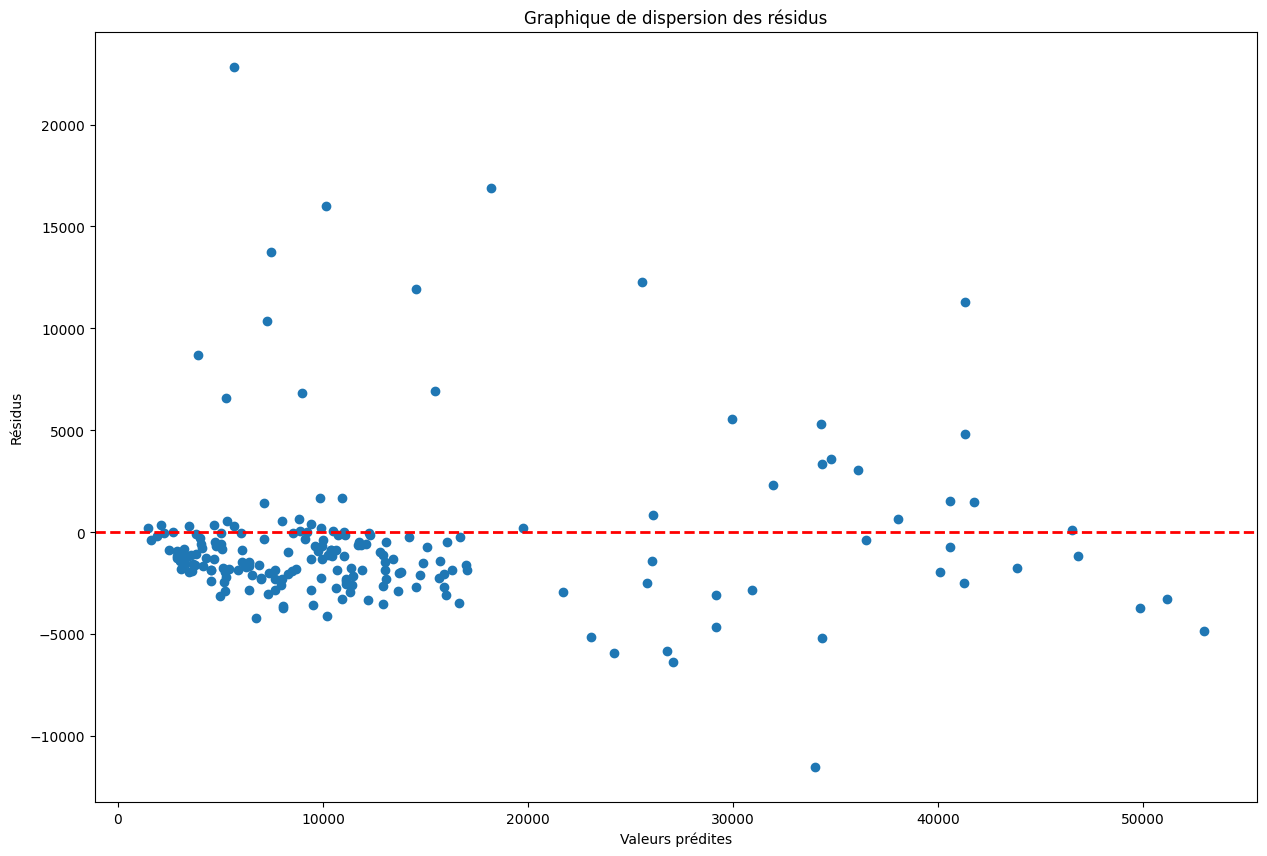

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Faire des prédictions sur les données de test
y_pred = my_pipe_lr.predict(X_test)

# Calculer les résidus
residuals = y_test - y_pred

# Tracer le graphique de dispersion entre les valeurs prédites et les résidus
plt.figure(figsize=(15,10))
plt.scatter(y_pred, residuals)
#sns.scatterplot(y_pred)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Ajouter une ligne horizontale à y=0 pour référence
plt.title('Graphique de dispersion des résidus')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV
param = {"lasso__alpha" : np.arange(0.5,50, 0.5)}

grid = GridSearchCV(my_pipe_lasso, param, cv=5)
grid.fit(X_train, y_train)

/home/utilisateur/Documents/DEV-IA/projets/machine_learning_assurance/machinelearning_assurance/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9773913695.029985, tolerance: 13153337.425098486
  model = cd_fast.sparse_enet_coordinate_descent(
/home/utilisateur/Documents/DEV-IA/projets/machine_learning_assurance/machinelearning_assurance/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10761242347.689701, tolerance: 12983618.917300116
  model = cd_fast.sparse_enet_coordinate_descent(


/home/utilisateur/Documents/DEV-IA/projets/machine_learning_assurance/machinelearning_assurance/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10968885431.687891, tolerance: 13974848.585028803
  model = cd_fast.sparse_enet_coordinate_descent(
/home/utilisateur/Documents/DEV-IA/projets/machine_learning_assurance/machinelearning_assurance/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10659610071.33016, tolerance: 13813053.787957232
  model = cd_fast.sparse_enet_coordinate_descent(
/home/utilisateur/Documents/DEV-IA/projets/machine_learning_assurance/machinelearning_assurance/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('polynomialfeatures',
                                                                                          PolynomialFeatures()),
                                                                                         ('robustscaler',
                                                                                          RobustScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children',
                                                                          'smoker',
                                                                          'smoker_bmi']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder()),
                                                                                         ('polynomialfeatures',
                                                                                          PolynomialFea...
       11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5,
       17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. ,
       22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5,
       28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5, 33. ,
       33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. , 38.5,
       39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5, 44. ,
       44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. , 49.5])})

In [20]:
len(np.arange(0.01,10, 0.1))

100

In [21]:
grid.best_params_

{'lasso__alpha': 30.5}

### Ridge

In [22]:
# REGRESSION RIDGE CV 
my_pipe_ridge = make_pipeline(preprocessing, Ridge(alpha=1e-05))
# Je fit sur les données
my_pipe_ridge.fit(X_train, y_train)
# le score
print(f"regression ridge : {my_pipe_ridge.score(X_test, y_test)}")

regression ridge : 0.9028744246298186


In [23]:
from sklearn.model_selection import GridSearchCV
param = {"ridge__alpha" : np.arange(0.00001, 0.0001, 0.05)}

grid = GridSearchCV(my_pipe_ridge, param, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('polynomialfeatures',
                                                                                          PolynomialFeatures()),
                                                                                         ('robustscaler',
                                                                                          RobustScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children',
                                                                          'smoker',
                                                                          'smoker_bmi']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder()),
                                                                                         ('polynomialfeatures',
                                                                                          PolynomialFeatures())]),
                                                                         ['sex',
                                                                          'region',
                                                                          'bmi_categories'])])),
                                       ('ridge', Ridge(alpha=1e-05))]),
             param_grid={'ridge__alpha': array([1.e-05])})

In [24]:
grid.best_params_

{'ridge__alpha': 1e-05}

### ElasticNet

In [25]:
# REGRESSION ELASTICNETCV
my_pipe_elasticnet = make_pipeline(preprocessing, ElasticNet(alpha=9.1e-05)) # avant alpha = 0.01
# Je fit sur les données
my_pipe_elasticnet.fit(X_train, y_train)
# le score
print(f"regression elasticnet : {my_pipe_elasticnet.score(X_test, y_test)}")

# si l1_ratio = 1 alors elasticnet devient un lasso
# si l1_ratio = 0 alors elasticnet devient un ridge

regression elasticnet : 0.8973926222422088


/home/utilisateur/Documents/DEV-IA/projets/machine_learning_assurance/machinelearning_assurance/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12977495574.313517, tolerance: 16674164.867911292
  model = cd_fast.sparse_enet_coordinate_descent(


In [26]:
from sklearn.model_selection import GridSearchCV
param = {"elasticnet__alpha" : np.arange(0.000001, 0.0001, 0.00001),
         "elasticnet__l1_ratio" : np.arange(0.001, 1, 0.1)}

grid = GridSearchCV(my_pipe_elasticnet, param, cv=5)
grid.fit(X_train, y_train)

# np.arange(0.000001, 0.0001, 0.1)

/home/utilisateur/Documents/DEV-IA/projets/machine_learning_assurance/machinelearning_assurance/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9757974413.083988, tolerance: 13153337.425098486
  model = cd_fast.sparse_enet_coordinate_descent(
/home/utilisateur/Documents/DEV-IA/projets/machine_learning_assurance/machinelearning_assurance/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10744294570.480907, tolerance: 12983618.917300116
  model = cd_fast.sparse_enet_coordinate_descent(
/home/utilisateur/Documents/DEV-IA/projets/machine_learning_assurance/machinelearning_assurance/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('polynomialfeatures',
                                                                                          PolynomialFeatures()),
                                                                                         ('robustscaler',
                                                                                          RobustScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children',
                                                                          'smoker',
                                                                          'smoker_bmi']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder()),
                                                                                         ('polynomialfeatures',
                                                                                          PolynomialFeatures())]),
                                                                         ['sex',
                                                                          'region',
                                                                          'bmi_categories'])])),
                                       ('elasticnet',
                                        ElasticNet(alpha=9.1e-05))]),
             param_grid={'elasticnet__alpha': array([1.0e-06, 1.1e-05, 2.1e-05, 3.1e-05, 4.1e-05, 5.1e-05, 6.1e-05,
       7.1e-05, 8.1e-05, 9.1e-05]),
                         'elasticnet__l1_ratio': array([0.001, 0.101, 0.201, 0.301, 0.401, 0.501, 0.601, 0.701, 0.801,
       0.901])})

In [27]:
len(np.arange(0.000001, 0.0001, 0.000001))

100

In [28]:
grid.best_params_

{'elasticnet__alpha': 9.1e-05, 'elasticnet__l1_ratio': 0.001}

In [29]:
poly = PolynomialFeatures(2).fit_transform